In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
neo_df = pd.read_csv("neo.csv")
neo_df.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


<AxesSubplot:>

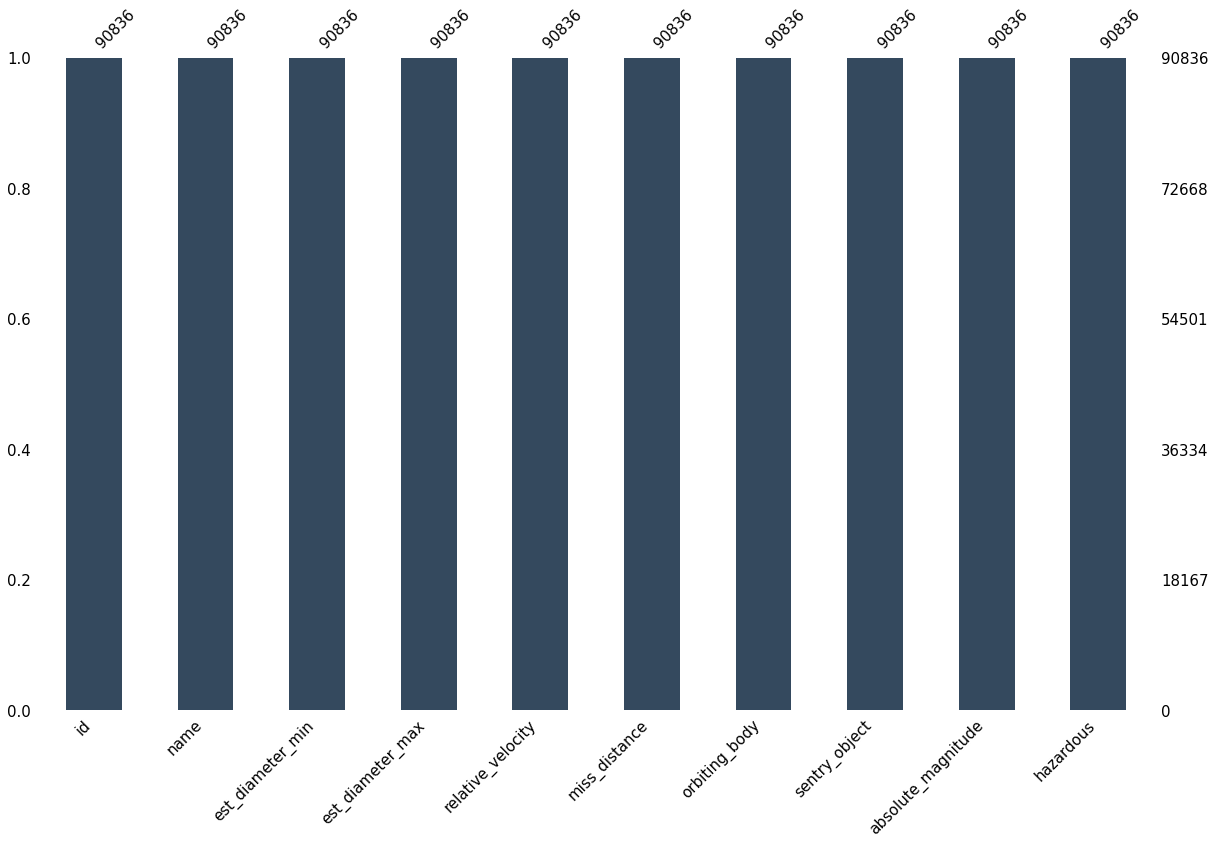

In [3]:
# plotting the dataframe as barplot
msno.bar(neo_df, sort="ascending", figsize=(20,12), color="#34495e", fontsize=15, labels=True)

In [4]:
# checking the null values from the dataset
neo_df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

We can see that our dataset doesn't have any null values.

In [5]:
# Checking the info about the dataset
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
# describing stats of the numerical features
neo_df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [7]:
# The features like est_diameter_min, est_diameter_max is right skewed as mean>median.
# Others features are slightly skewed to either left or right.

In [8]:
# Checking the features with unique values
neo_df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [9]:
# Checking the duplicated id in the dataset
duplicate_in_id = neo_df.duplicated(subset=['id'])
if duplicate_in_id.any():
    duplicated_data = neo_df.loc[~duplicate_in_id]
duplicated_data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90561,3779523,(2017 OL68),0.176423,0.394494,4649.668900,4.064435e+07,Earth,False,20.89,False
90608,54272756,(2022 GA4),0.232571,0.520044,34153.422552,3.376447e+07,Earth,False,20.29,False
90711,54225015,(2021 WR3),0.310853,0.695088,103342.744852,6.254685e+07,Earth,False,19.66,False
90806,3735178,(2015 VK142),0.350393,0.783502,65388.349843,6.344693e+07,Earth,False,19.40,False


In [10]:
# It seems we have multiple entries with same id and name
neo_df[neo_df.id == 2277475]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
1,2277475,277475 (2005 WK4),0.2658,0.594347,73588.726663,6.143813e+07,Earth,False,20.0,True
2987,2277475,277475 (2005 WK4),0.2658,0.594347,61901.603043,4.524364e+07,Earth,False,20.0,True
6045,2277475,277475 (2005 WK4),0.2658,0.594347,50311.059979,2.916569e+07,Earth,False,20.0,True
9098,2277475,277475 (2005 WK4),0.2658,0.594347,39441.471833,1.413990e+07,Earth,False,20.0,True
12274,2277475,277475 (2005 WK4),0.2658,0.594347,29915.341374,9.011010e+06,Earth,False,20.0,True
15886,2277475,277475 (2005 WK4),0.2658,0.594347,24290.592492,2.113144e+07,Earth,False,20.0,True
18692,2277475,277475 (2005 WK4),0.2658,0.594347,19500.626054,3.856749e+07,Earth,False,20.0,True
19398,2277475,277475 (2005 WK4),0.2658,0.594347,26846.341154,3.231632e+07,Earth,False,20.0,True
21896,2277475,277475 (2005 WK4),0.2658,0.594347,22741.453456,4.538419e+07,Earth,False,20.0,True
23334,2277475,277475 (2005 WK4),0.2658,0.594347,29325.965639,3.883943e+07,Earth,False,20.0,True


We will be keeping the last record for same id and name as it is general assumption that entry in database is sequential

In [11]:
neo_df.drop_duplicates(subset=["id", "name"], keep='last', inplace=True,ignore_index=True)
neo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27423 entries, 0 to 27422
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27423 non-null  int64  
 1   name                27423 non-null  object 
 2   est_diameter_min    27423 non-null  float64
 3   est_diameter_max    27423 non-null  float64
 4   relative_velocity   27423 non-null  float64
 5   miss_distance       27423 non-null  float64
 6   orbiting_body       27423 non-null  object 
 7   sentry_object       27423 non-null  bool   
 8   absolute_magnitude  27423 non-null  float64
 9   hazardous           27423 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
neo_df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     27421
miss_distance         27357
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [13]:
# checking the descrptive statistics of updated dataframe
neo_df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,2.742300e+04,27423.000000,27423.000000,27423.000000,2.742300e+04,27423.000000
mean,1.522211e+07,0.139082,0.310996,46291.838877,2.854062e+07,23.361668
std,2.137963e+07,0.374420,0.837229,25497.687688,2.295326e+07,2.869921
min,2.000433e+06,0.000609,0.001362,203.346433,9.316925e+03,9.230000
25%,3.520758e+06,0.021113,0.047211,27014.719439,7.135722e+06,21.200000
50%,3.756059e+06,0.050647,0.113250,41501.083247,2.344626e+07,23.600000
75%,3.968766e+06,0.152952,0.342011,60896.311185,4.766861e+07,25.500000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [14]:
# Dropping the columns id, name, orbiting_body as they are unique and redundant 
modified_df = neo_df.drop(columns=["id", "name", "orbiting_body"], axis=0)
modified_df.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,False,16.73,False
1,0.441118,0.986370,69871.977311,5.843872e+07,False,18.90,False
2,1.029331,2.301654,24889.185305,7.403522e+07,False,17.06,False
3,0.305179,0.682402,50429.075188,6.849300e+07,False,19.70,False
4,0.334622,0.748238,82722.619151,4.418116e+07,False,19.50,True


It seems that est_diameter_min and est_diameter_max are right skewed compared to others.

In [15]:
# plotting the distribution of the numerical data.
numerical_cols = modified_df.select_dtypes(include='number').columns
numerical_cols = numerical_cols.to_list()
numerical_cols

['est_diameter_min',
 'est_diameter_max',
 'relative_velocity',
 'miss_distance',
 'absolute_magnitude']

<Figure size 1296x864 with 0 Axes>

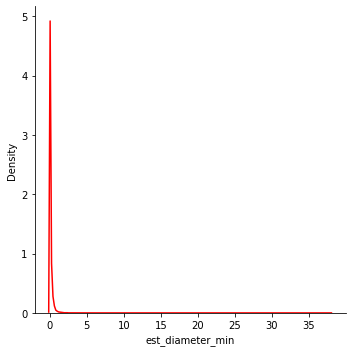

<Figure size 1296x864 with 0 Axes>

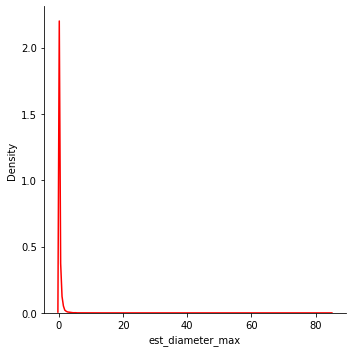

<Figure size 1296x864 with 0 Axes>

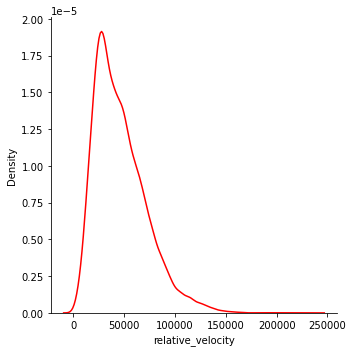

<Figure size 1296x864 with 0 Axes>

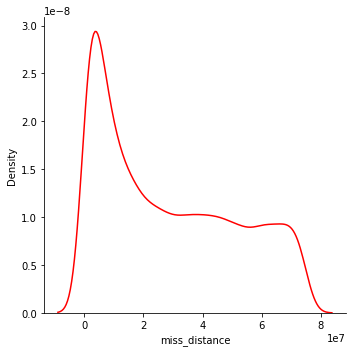

<Figure size 1296x864 with 0 Axes>

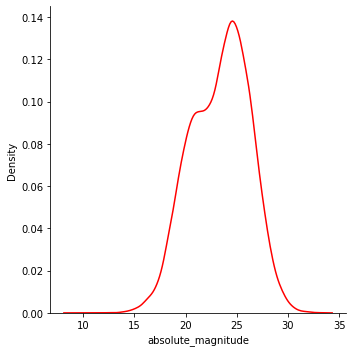

In [16]:
for col in numerical_cols:
    plt.figure(figsize=(18,12))
    sns.displot(data=modified_df, x=col, kind="kde", color='red')
plt.show()

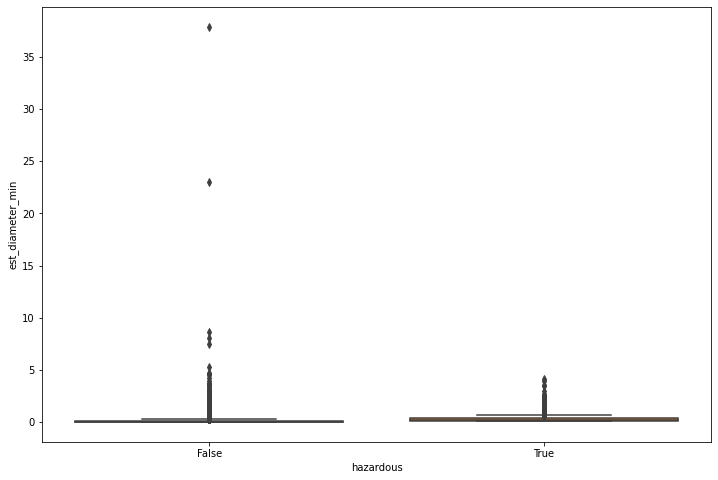

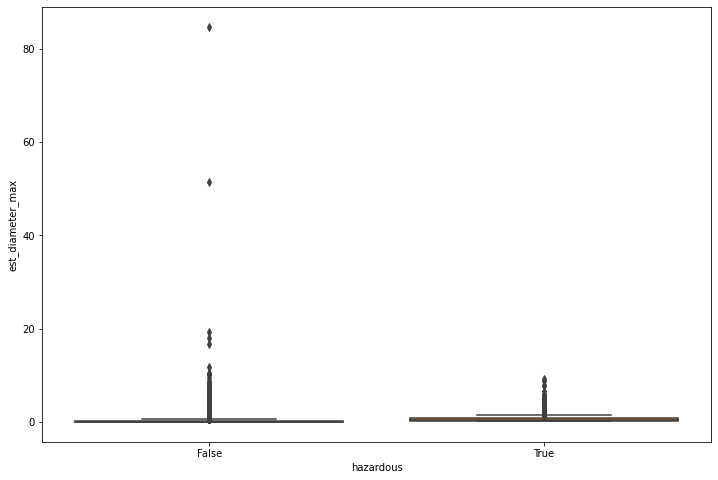

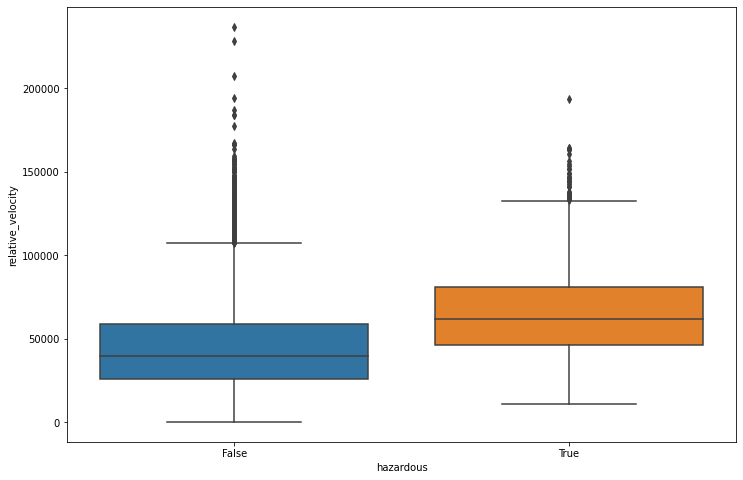

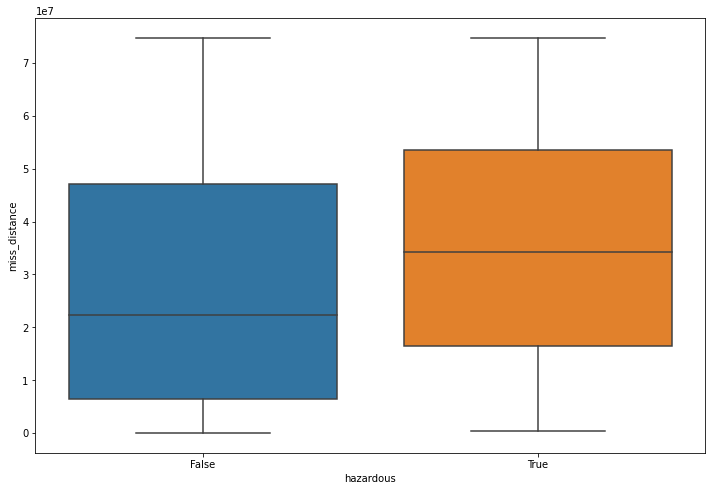

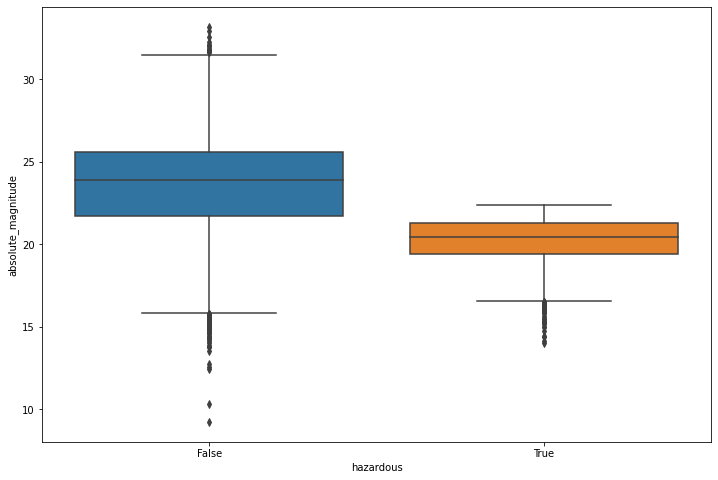

In [17]:
# Checking for outliers using the boxplot
for col in numerical_cols:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=modified_df, x = 'hazardous', y=col)
plt.show()

It seems that there are some outliers but since it is scientific obseravtion data from NASA we will leav eit like this.

In [18]:
# Checking the value_counts of sentry_object
modified_df.sentry_object.value_counts()

False    27423
Name: sentry_object, dtype: int64

In [19]:
# we will be dropping the sentry_object as it doesn't have any variance around it.
modified_df.drop(columns=["sentry_object"], axis=0, inplace=True)
modified_df.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.441118,0.986370,69871.977311,5.843872e+07,18.90,False
2,1.029331,2.301654,24889.185305,7.403522e+07,17.06,False
3,0.305179,0.682402,50429.075188,6.849300e+07,19.70,False
4,0.334622,0.748238,82722.619151,4.418116e+07,19.50,True


In [20]:
modified_df.hazardous.value_counts()

False    25250
True      2173
Name: hazardous, dtype: int64

<AxesSubplot:xlabel='hazardous', ylabel='count'>

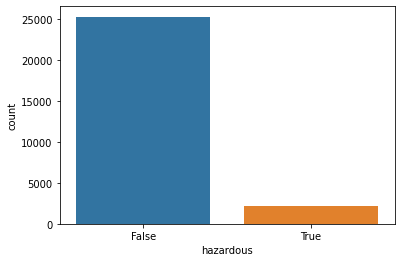

In [21]:
sns.countplot(data=modified_df, x= "hazardous")

In [25]:
modified_df.hazardous = modified_df.hazardous.map(lambda x: 1 if x else 0)

In [26]:
# Dividing the features into the dependent and independent variables
y = modified_df["hazardous"]
X = modified_df.drop(columns=["hazardous"], axis=0)

In [27]:
X.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.441118,0.986370,69871.977311,5.843872e+07,18.90
2,1.029331,2.301654,24889.185305,7.403522e+07,17.06
3,0.305179,0.682402,50429.075188,6.849300e+07,19.70
4,0.334622,0.748238,82722.619151,4.418116e+07,19.50


In [28]:
y[0:5]

0    0
1    0
2    0
3    0
4    1
Name: hazardous, dtype: int64

It seems that the dataset is highly imbalanced. So we will be handling this situation with SMOTE method for sampling.

In [29]:
# OverSampling with SMNOTE
from imblearn.over_sampling import SMOTE

over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

In [30]:
X.shape, y.shape

((50500, 5), (50500,))

In [31]:
y.value_counts()

0    25250
1    25250
Name: hazardous, dtype: int64

In [33]:
# we will now perform the train-test split in our dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
X_train.shape, y_train.shape

((37875, 5), (37875,))

In [35]:
from sklearn.preprocessing import RobustScaler

rsc = RobustScaler()
X_train_sc = rsc.fit_transform(X_train)
X_test_sc = rsc.transform(X_test)
X_train_sc[0:5]

array([[-0.40980072, -0.40980072, -0.15623049, -0.57838739,  0.5163684 ],
       [ 0.50031885,  0.50031885, -0.18502154, -0.61754065, -0.24398511],
       [-0.00908594, -0.00908594, -0.09311251,  0.05665629,  0.0073832 ],
       [ 0.83805286,  0.83805286,  0.00567161, -0.19950527, -0.46473156],
       [ 3.56573533,  3.56573533,  1.46449188, -0.66688071, -1.02893571]])

In [38]:
# Using XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train_sc, y_train)

y_pred_test = xgb_clf.predict(X_test_sc)

print("Train Accuracy: ", xgb_clf.score(X_train_sc, y_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9624290429042904
Test Accuracy:  0.9439207920792079


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_sc, y_train)
y_pred = rf_clf.predict(X_test_sc)

print("Train Accuracy: ", rf_clf.score(X_train_sc, y_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Train Accuracy:  0.9999471947194719
Test Accuracy:  0.940039603960396


In [40]:
from sklearn.ensemble import AdaBoostClassifier

ad_clf = AdaBoostClassifier()
ad_clf.fit(X_train_sc, y_train)
y_pred = ad_clf.predict(X_test_sc)

print("Train Accuracy: ", ad_clf.score(X_train_sc, y_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Train Accuracy:  0.8875511551155115
Test Accuracy:  0.8867326732673267


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_sc, y_train)
y_pred = gb_clf.predict(X_test_sc)

print("Train Accuracy: ", gb_clf.score(X_train_sc, y_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Train Accuracy:  0.9018349834983498
Test Accuracy:  0.898930693069307
